In [176]:
# Import libraries
library(dplyr)
library(readr)
library(tidyr)
library(ggplot2)
library(cowplot)

# Initial Analysis

In [98]:
# Read 'Climate_HistoricalNormals.csv' file
weatherDF <- read_csv(
    "../../data/dataverse_files/Climate_HourlyWeather.csv",
    col_types = cols(
        `Date/Time` = col_datetime(),
        Year = col_integer(),
        Month = col_integer(),
        Day = col_integer(),
        Time = col_time(),
        `Data Quality` = col_character(),
        `Temp (C)` = col_double(),
        `Temp Flag` = col_character(),
        `Dew Point Temp (C)` = col_double(),
        `Dew Point Temp Flag` = col_character(),
        `Rel Hum (%)` = col_integer(),
        `Rel Hum Flag` = col_character(),
        `Wind Dir (10s deg)` = col_integer(),
        `Wind Dir Flag` = col_character(),
        `Wind Spd (km/h)` = col_integer(),
        `Wind Spd Flag` = col_character(),
        `Visibility (km)` = col_double(),
        `Visibility Flag` = col_character(),
        `Stn Press (kPa)` = col_double(),
        `Stn Press Flag` = col_character(),
        Hmdx = col_double(), # TBD
        `Hmdx Flag` = col_character(),
        `Wind Chill` = col_integer(), # TBD
        `Wind Chill Flag` = col_character(),
        Weather = col_character()
    )
)
# Describe the file (cols name, cols type, first values, etc.)
glimpse(weatherDF)

Rows: 17,520
Columns: 25
$ `Date/Time`           <dttm> 2012-04-01 00:00:00, 2012-04-01 01:00:00, 2012-…
$ Year                  <int> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, …
$ Month                 <int> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, …
$ Day                   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ Time                  <time> 00:00:00, 01:00:00, 02:00:00, 03:00:00, 04:00:0…
$ `Data Quality`        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Temp (C)`            <dbl> 4.3, 4.4, 3.8, 2.8, 2.4, 3.0, 3.7, 4.7, 5.3, 5.9…
$ `Temp Flag`           <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Dew Point Temp (C)`  <dbl> 2.3, 2.2, 1.6, 0.7, 0.4, 0.9, 1.7, 1.3, 1.3, 1.9…
$ `Dew Point Temp Flag` <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Rel Hum (%)`         <int> 87, 86, 86, 86, 87, 86, 87, 79, 75, 75, 68, 61, …
$ `Rel Hum Flag`        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Wind Dir (10

In [207]:
# Cleanup of NA values
# All NAs are replaced with the median value of their respective column
cleanWeatherDF <- weatherDF %>%
    mutate(
        `Temp (C)`              =  coalesce(`Temp (C)`, median(`Temp (C)`, na.rm = TRUE)),
        `Dew Point Temp (C)`    =  coalesce(`Dew Point Temp (C)`, median(`Dew Point Temp (C)`, na.rm = TRUE)),
        `Rel Hum (%)`           =  coalesce(`Rel Hum (%)`, median(`Rel Hum (%)`, na.rm = TRUE)),
        `Wind Dir (10s deg)`    =  coalesce(`Wind Dir (10s deg)`, median(`Wind Dir (10s deg)`, na.rm = TRUE)),
        `Wind Spd (km/h)`       =  coalesce(`Wind Spd (km/h)`, median(`Wind Spd (km/h)`, na.rm = TRUE)),
        `Visibility (km)`       =  coalesce(`Visibility (km)`, median(`Visibility (km)`, na.rm = TRUE)),
        `Stn Press (kPa)`       =  coalesce(`Stn Press (kPa)`, median(`Stn Press (kPa)`, na.rm = TRUE)),
        Hmdx                    =  coalesce(Hmdx, median(Hmdx, na.rm = TRUE)),
        `Wind Chill`            =  coalesce(`Wind Chill`, median(`Wind Chill`, na.rm = TRUE))
    )

glimpse(cleanWeatherDF)

Rows: 17,520
Columns: 25
$ `Date/Time`           <dttm> 2012-04-01 00:00:00, 2012-04-01 01:00:00, 2012-…
$ Year                  <int> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, …
$ Month                 <int> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, …
$ Day                   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ Time                  <time> 00:00:00, 01:00:00, 02:00:00, 03:00:00, 04:00:0…
$ `Data Quality`        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Temp (C)`            <dbl> 4.3, 4.4, 3.8, 2.8, 2.4, 3.0, 3.7, 4.7, 5.3, 5.9…
$ `Temp Flag`           <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Dew Point Temp (C)`  <dbl> 2.3, 2.2, 1.6, 0.7, 0.4, 0.9, 1.7, 1.3, 1.3, 1.9…
$ `Dew Point Temp Flag` <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Rel Hum (%)`         <dbl> 87, 86, 86, 86, 87, 86, 87, 79, 75, 75, 68, 61, …
$ `Rel Hum Flag`        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Wind Dir (10

Rows: 17,520
Columns: 25
$ `Date/Time`           <dttm> 2012-04-01 00:00:00, 2012-04-01 01:00:00, 2012-…
$ Year                  <int> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, …
$ Month                 <int> 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, …
$ Day                   <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ Time                  <time> 00:00:00, 01:00:00, 02:00:00, 03:00:00, 04:00:0…
$ `Data Quality`        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Temp (C)`            <dbl> 4.3, 4.4, 3.8, 2.8, 2.4, 3.0, 3.7, 4.7, 5.3, 5.9…
$ `Temp Flag`           <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Dew Point Temp (C)`  <dbl> 2.3, 2.2, 1.6, 0.7, 0.4, 0.9, 1.7, 1.3, 1.3, 1.9…
$ `Dew Point Temp Flag` <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Rel Hum (%)`         <dbl> 87, 86, 86, 86, 87, 86, 87, 79, 75, 75, 68, 61, …
$ `Rel Hum Flag`        <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ `Wind Dir (10

In [242]:
groupedDF <- cleanWeatherDF %>%
    mutate(Date = as.Date(`Date/Time`)) %>%
    group_by(Month) %>%
    summarise(
        avg_temp        = mean(`Temp (C)`),
        med_temp        = median(`Temp (C)`),
        avg_dewpt_temp  = mean(`Dew Point Temp (C)`),
        med_dewpt_temp  = median(`Dew Point Temp (C)`),
        avg_rel_hum_pct = mean(`Rel Hum (%)`),
        med_rel_hum_pct = median(`Rel Hum (%)`),
        avg_wind_dir    = mean(`Wind Dir (10s deg)`),
        med_wind_dir    = median(`Wind Dir (10s deg)`),
        avg_wind_spd    = mean(`Wind Spd (km/h)`),
        med_wind_spd    = median(`Wind Spd (km/h)`),
        avg_visib       = mean(`Visibility (km)`),
        med_visib       = median(`Visibility (km)`),
        avg_stn_press   = mean(`Stn Press (kPa)`),
        med_stn_press   = median(`Stn Press (kPa)`),
        avg_hmdx        = mean(Hmdx),
        med_hmdx        = median(Hmdx),
        avg_wind_chill  = mean(`Wind Chill`),
        med_wind_chill  = median(`Wind Chill`)
    ) %>%
    mutate(
        Month = factor(Month)
    )

groupedDF %>%
    slice(1:10)

Month,avg_temp,med_temp,avg_dewpt_temp,med_dewpt_temp,avg_rel_hum_pct,med_rel_hum_pct,avg_wind_dir,med_wind_dir,avg_wind_spd,med_wind_spd,avg_visib,med_visib,avg_stn_press,med_stn_press,avg_hmdx,med_hmdx,avg_wind_chill,med_wind_chill
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3.597782,4.1,2.15927419,2.8,90.50470,93.0,16.45430,12.5,10.33199,9,20.43730,24.1,102.2225,102.360,26.00000,26,-4.941532,-5
2,4.002232,4.9,0.01904762,1.5,76.91369,80.0,15.86533,13.0,14.17113,12,24.07202,24.1,101.7623,101.830,26.00000,26,-5.236607,-5
3,7.079704,7.4,3.40409946,3.7,78.19489,79.0,17.37030,14.0,14.80981,13,28.30927,24.1,101.6954,101.820,26.00000,26,-4.991935,-5
4,9.475625,9.6,4.69493056,4.8,72.96111,74.0,18.16250,15.0,14.33264,13,30.15625,32.2,101.7086,101.800,26.00000,26,-5.000000,-5
5,12.727285,12.6,7.05840054,7.3,69.46841,69.5,18.85215,18.0,13.49194,13,34.32527,32.2,101.7931,101.700,26.00000,26,-5.000000,-5
6,15.104375,15.1,9.91583333,9.9,71.95139,72.0,17.95208,15.0,12.73472,13,32.43910,32.2,101.5514,101.605,26.04583,26,-5.000000,-5
7,17.985013,17.8,12.07829301,12.4,68.97245,68.0,18.32325,16.0,13.22917,13,37.94402,48.3,101.6402,101.660,26.04570,26,-5.000000,-5
8,18.602083,18.5,13.48427419,13.7,73.07594,74.0,17.90323,14.0,12.44153,13,36.09892,32.2,101.5335,101.520,26.14583,26,-5.000000,-5
9,15.295417,15.2,11.87986111,11.6,80.91806,83.0,19.71458,17.0,11.97917,11,33.89049,32.2,101.5141,101.660,25.99792,26,-5.000000,-5


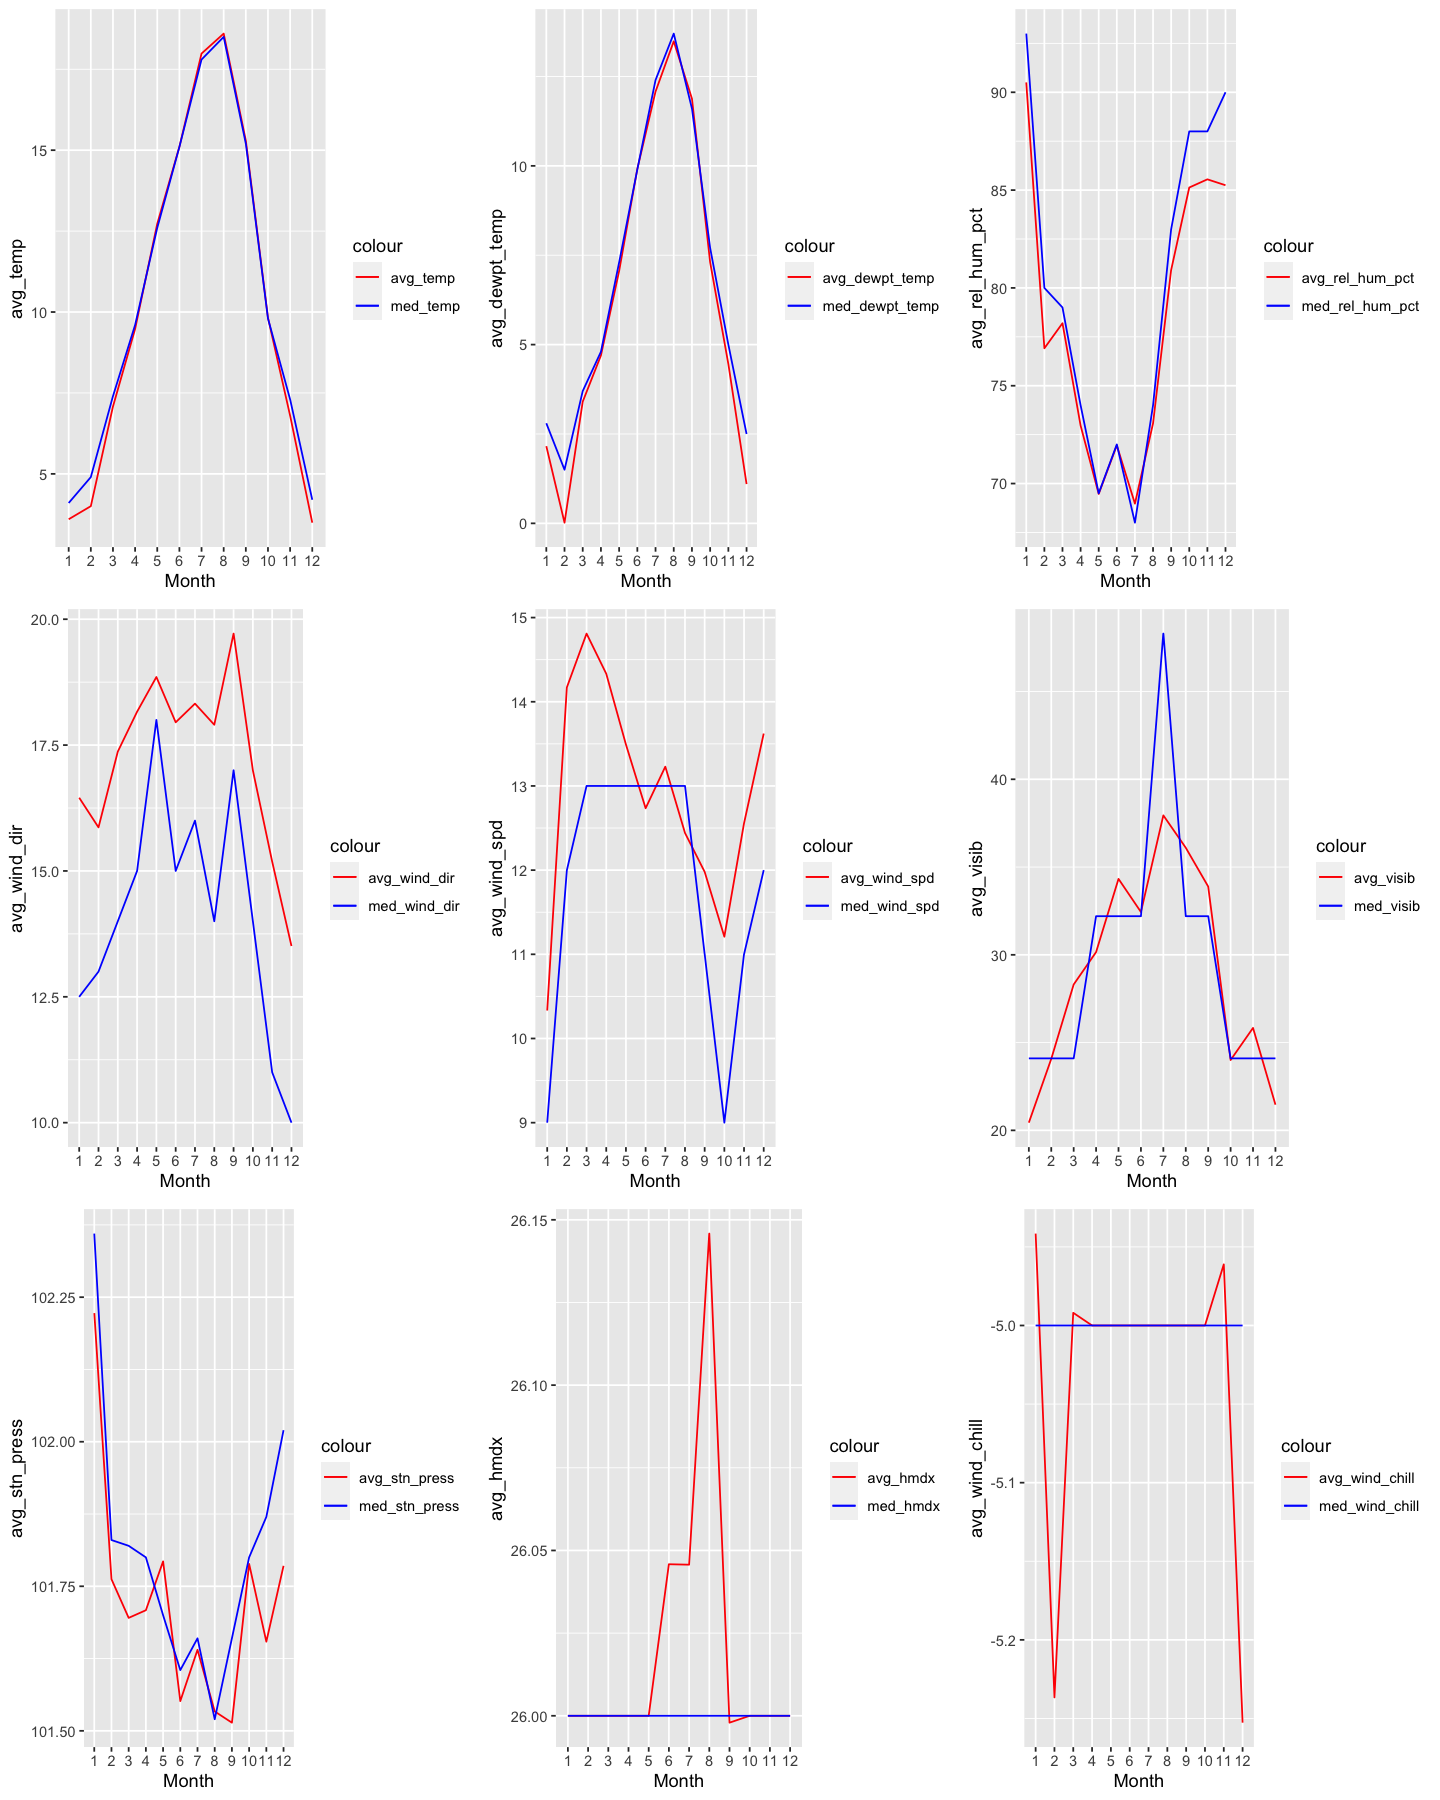

In [222]:
options(repr.plot.width = 12, repr.plot.height = 15)

plt1 <- ggplot(groupedDF, aes(x = Month, group = 1)) + 
    geom_line(aes(y = avg_temp, color = "avg_temp")) + geom_line(aes(y = med_temp, color = "med_temp")) + scale_color_manual(values = c("avg_temp" = "red", "med_temp" = "blue"))

plt2 <- ggplot(groupedDF, aes(x = Month, group = 1)) + 
    geom_line(aes(y = avg_dewpt_temp, color = "avg_dewpt_temp")) + geom_line(aes(y = med_dewpt_temp, color = "med_dewpt_temp")) + scale_color_manual(values = c("avg_dewpt_temp" = "red", "med_dewpt_temp" = "blue"))

plt3 <- ggplot(groupedDF, aes(x = Month, group = 1)) + 
    geom_line(aes(y = avg_rel_hum_pct, color = "avg_rel_hum_pct")) + geom_line(aes(y = med_rel_hum_pct, color = "med_rel_hum_pct")) + scale_color_manual(values = c("avg_rel_hum_pct" = "red", "med_rel_hum_pct" = "blue"))

plt4 <- ggplot(groupedDF, aes(x = Month, group = 1)) + 
    geom_line(aes(y = avg_wind_dir, color = "avg_wind_dir")) + geom_line(aes(y = med_wind_dir, color = "med_wind_dir")) + scale_color_manual(values = c("avg_wind_dir" = "red", "med_wind_dir" = "blue"))

plt5 <- ggplot(groupedDF, aes(x = Month, group = 1)) + 
    geom_line(aes(y = avg_wind_spd, color = "avg_wind_spd")) + geom_line(aes(y = med_wind_spd, color = "med_wind_spd")) + scale_color_manual(values = c("avg_wind_spd" = "red", "med_wind_spd" = "blue"))

plt6 <- ggplot(groupedDF, aes(x = Month, group = 1)) + 
    geom_line(aes(y = avg_visib, color = "avg_visib")) + geom_line(aes(y = med_visib, color = "med_visib")) + scale_color_manual(values = c("avg_visib" = "red", "med_visib" = "blue"))

plt7 <- ggplot(groupedDF, aes(x = Month, group = 1)) + 
    geom_line(aes(y = avg_stn_press, color = "avg_stn_press")) + geom_line(aes(y = med_stn_press, color = "med_stn_press")) + scale_color_manual(values = c("avg_stn_press" = "red", "med_stn_press" = "blue"))

plt8 <- ggplot(groupedDF, aes(x = Month, group = 1)) + 
    geom_line(aes(y = avg_hmdx, color = "avg_hmdx")) + geom_line(aes(y = med_hmdx, color = "med_hmdx")) + scale_color_manual(values = c("avg_hmdx" = "red", "med_hmdx" = "blue"))

plt9 <- ggplot(groupedDF, aes(x = Month, group = 1)) + 
    geom_line(aes(y = avg_wind_chill, color = "avg_wind_chill")) + geom_line(aes(y = med_wind_chill, color = "med_wind_chill")) + scale_color_manual(values = c("avg_wind_chill" = "red", "med_wind_chill" = "blue"))

plot_grid(plt1, plt2, plt3, plt4, plt5, plt6, plt7, plt8, plt9, ncol = 3)

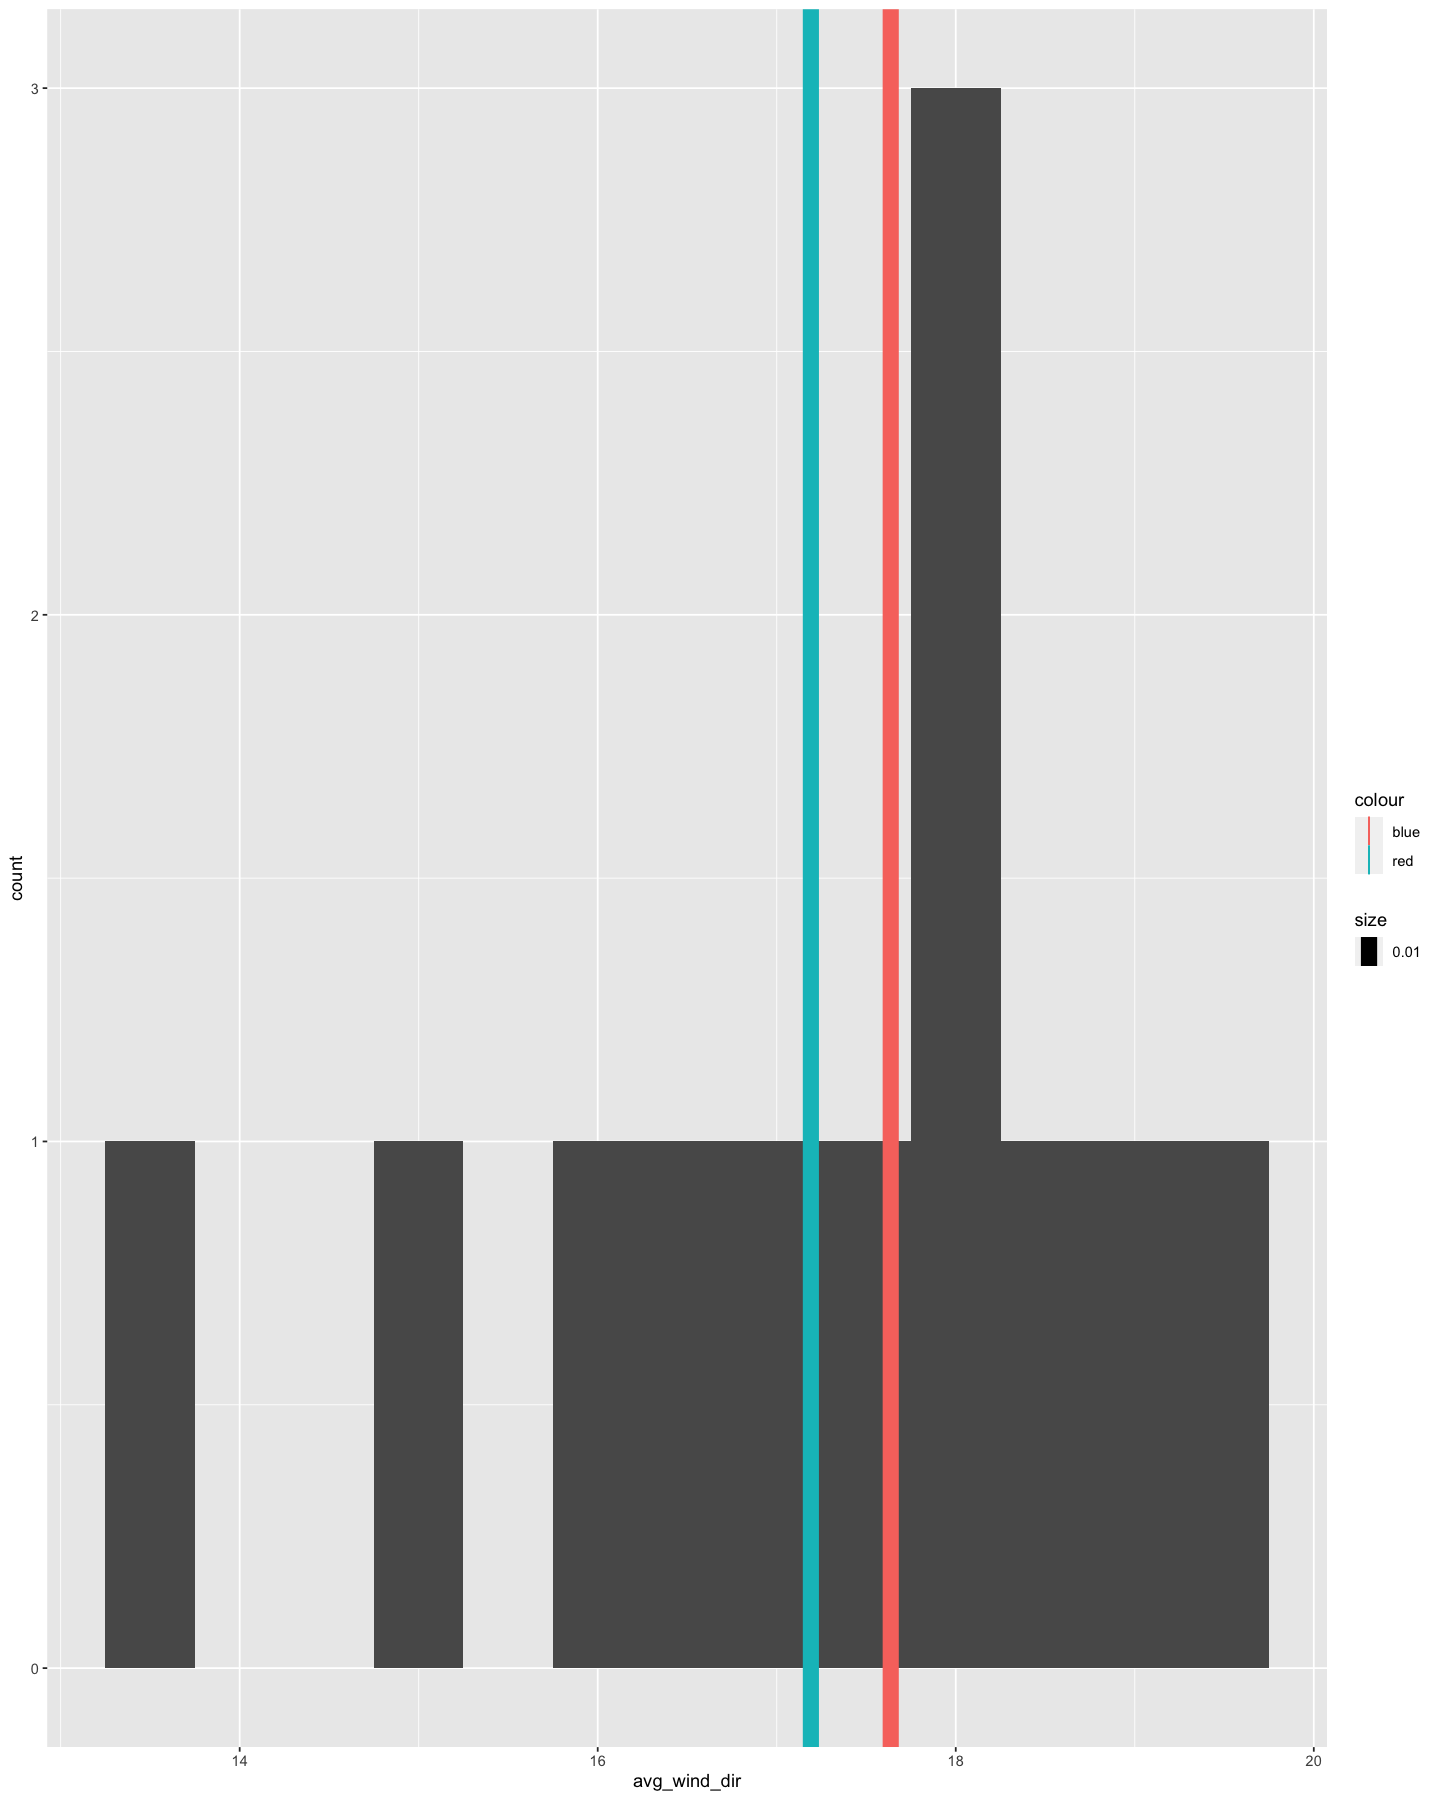

In [238]:
ggplot(groupedDF, aes(x = avg_wind_dir)) +
    geom_histogram(binwidth = 0.5) + 
    geom_vline(aes(xintercept = mean(avg_wind_dir), size = 0.01, color = "red")) +
    geom_vline(aes(xintercept = median(avg_wind_dir), size = 0.01, color = "blue"))